In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "data/all_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Filter out rows with NaN values in the 'listeners' column
df = df[df['listeners'].notna()]

# Filter out rows where 'listeners' is 0
df = df[df['listeners'] != 0]

In [4]:
# Drop the unneeded columns
df = df.drop(columns=['location', 'genre', 'Country', 'Capital', 'Latitude', 'Longitude'])

# Display the updated DataFrame to verify the removal
df.head()

,track_id_number,track_id,track_name,artist_name,listeners,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Tonnetz2,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language
0,1,Saoko,Saoko,Rosalía,1374833,-87.781052,110.309486,-8.193514,12.189231,-7.424947,...,0.031682,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,es
1,2,LA+FAMA,LA FAMA,Rosalía,1374833,-142.864670,129.827835,5.117205,23.859261,5.489446,...,0.126945,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,es
2,3,Spanish+Caravan,Spanish Caravan,The Doors,4214537,-208.096588,98.872444,-13.651766,36.340504,-1.073513,...,-0.067584,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,en
3,4,MALAMENTE+-+Cap.1:+Augurio,MALAMENTE - Cap.1: Augurio,Rosalía,1374833,-144.406586,103.702049,5.672822,21.341652,10.030981,...,0.103094,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,es
4,5,Chicken+Teriyaki,Chicken Teriyaki,Rosalía,1374833,-137.848801,85.967781,3.030798,22.190674,2.829472,...,0.015080,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,es


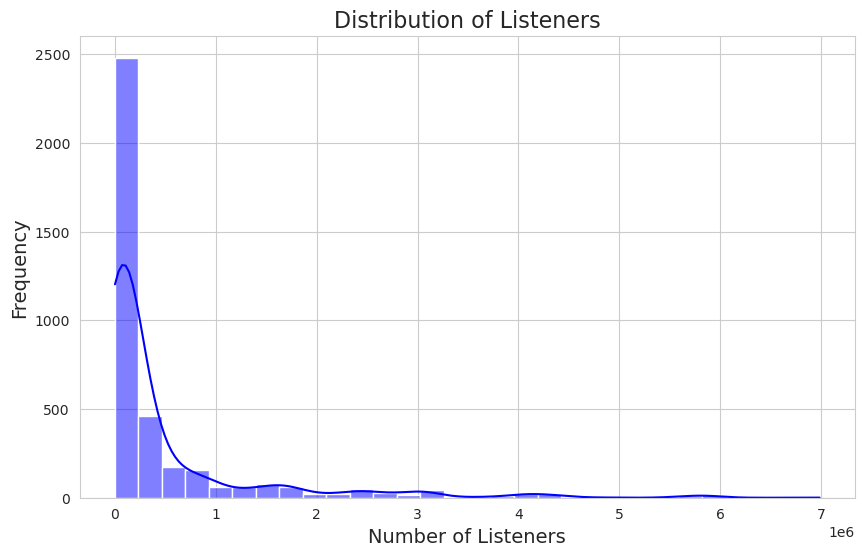

In [5]:
# Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plot
sns.set_style('whitegrid')

# Plot a histogram of the 'listeners' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['listeners'], bins=30, kde=True, color='blue')

# Add titles and labels
plt.title('Distribution of Listeners', fontsize=16)
plt.xlabel('Number of Listeners', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


In [6]:
low_threshold = df['listeners'].quantile(0.33)
high_threshold = df['listeners'].quantile(0.66)

# Create a new column 'category' to classify listeners
def categorize_listeners(value):
    if value <= low_threshold:
        return 'low'
    elif value <= high_threshold:
        return 'medium'
    else:
        return 'high'

df['category'] = df['listeners'].apply(categorize_listeners)

# Display the number of rows in each category
print(df['category'].value_counts())

# Print the threshold values
print(f"Low threshold (33rd percentile): {low_threshold}")
print(f"High threshold (66th percentile): {high_threshold}")

# Preview the DataFrame
df.head()

category
high      1292
low       1255
medium    1254
Name: count, dtype: int64
Low threshold (33rd percentile): 43640.0
High threshold (66th percentile): 241866.0


,track_id_number,track_id,track_name,artist_name,listeners,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language,category
0,1,Saoko,Saoko,Rosalía,1374833,-87.781052,110.309486,-8.193514,12.189231,-7.424947,...,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,es,high
1,2,LA+FAMA,LA FAMA,Rosalía,1374833,-142.864670,129.827835,5.117205,23.859261,5.489446,...,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,es,high
2,3,Spanish+Caravan,Spanish Caravan,The Doors,4214537,-208.096588,98.872444,-13.651766,36.340504,-1.073513,...,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,en,high
3,4,MALAMENTE+-+Cap.1:+Augurio,MALAMENTE - Cap.1: Augurio,Rosalía,1374833,-144.406586,103.702049,5.672822,21.341652,10.030981,...,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,es,high
4,5,Chicken+Teriyaki,Chicken Teriyaki,Rosalía,1374833,-137.848801,85.967781,3.030798,22.190674,2.829472,...,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,es,high


In [7]:
# Get the number of columns in the DataFrame
num_columns = len(df.columns)

# Print the number of columns
print(f"The dataset has {num_columns} columns.")

The dataset has 56 columns.


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize language column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Language'])

# Convert languages to integer sequences
df['language_encoded'] = tokenizer.texts_to_sequences(df['Language'])

# Since language is a single word, each sequence is a single number
df['language_encoded'] = df['language_encoded'].apply(lambda x: x[0] if x else 0)

# Convert to NumPy array for training
import numpy as np
X_language = np.array(df['language_encoded']).reshape(-1, 1)
df.drop(columns=['Language'], inplace=True)  # Remove the original Language column
df.rename(columns={'language_encoded': 'Language'}, inplace=True)  # Rename encoded column
# Move 'Language' before 'category'
cols = df.columns.tolist()  # Get current column order
cols.remove('Language')  # Remove 'Language' from the list
cols.insert(cols.index('category'), 'Language')  # Insert 'Language' before 'category'

# Reorder the DataFrame
df = df[cols]

In [9]:
# Select Features and Target
X_seq = df.iloc[:, 4:24].values  # MFCC1 to MFCC20 (sequential features)
X_nonseq = df.iloc[:, 24:-1].values  # Spectral Contrast, Tonnetz, etc. (non-sequential features)
y = df['category'].values  # Target variable

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Apply LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])
# Convert the encoded labels to one-hot encoding
y = to_categorical(y)

In [11]:
df

,track_id_number,track_id,track_name,artist_name,listeners,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language,category
0,1,Saoko,Saoko,Rosalía,1374833,-87.781052,110.309486,-8.193514,12.189231,-7.424947,...,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,2,high
1,2,LA+FAMA,LA FAMA,Rosalía,1374833,-142.864670,129.827835,5.117205,23.859261,5.489446,...,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,2,high
2,3,Spanish+Caravan,Spanish Caravan,The Doors,4214537,-208.096588,98.872444,-13.651766,36.340504,-1.073513,...,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,1,high
3,4,MALAMENTE+-+Cap.1:+Augurio,MALAMENTE - Cap.1: Augurio,Rosalía,1374833,-144.406586,103.702049,5.672822,21.341652,10.030981,...,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,2,high
4,5,Chicken+Teriyaki,Chicken Teriyaki,Rosalía,1374833,-137.848801,85.967781,3.030798,22.190674,2.829472,...,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,2,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5127,5224,End+Of+Love,End Of Love,Anna Abreu,54646,-138.658005,83.150330,0.411348,16.266539,-2.444114,...,0.098265,0.044978,0.026042,-0.020714,0.133496,5142.373954,0.099743,229.320317,1,medium
5128,5225,Chances,Chances,Jill Barber,181979,-273.283051,124.780128,5.880270,24.004688,-8.090865,...,0.049632,0.061562,0.001793,-0.005441,0.067839,2554.337484,0.058152,238.784036,1,medium
5129,5226,Forever,Forever,Sturm und Drang,59021,38.631622,63.954712,-0.771039,32.017376,-0.558016,...,0.005176,0.024704,0.001183,0.028819,0.338810,6135.716178,0.141349,198.298458,1,medium
5130,5227,Todii,Todii,Oliver Mtukudzi,61096,-95.678047,129.015182,9.116899,26.797274,0.688892,...,0.056516,-0.011660,-0.005137,-0.013422,0.274915,3168.206764,0.056786,314.212472,8,medium


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Normalize the features
scaler_seq = StandardScaler()
X_seq = scaler_seq.fit_transform(X_seq)

scaler_nonseq = StandardScaler()
X_nonseq = scaler_nonseq.fit_transform(X_nonseq)

In [13]:
from sklearn.model_selection import train_test_split

# Reshape sequential features for LSTM (timesteps = number of MFCCs, features = 1)
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

# Split data into training and testing sets
X_seq_train, X_seq_test, X_nonseq_train, X_nonseq_test, y_train, y_test = train_test_split(
    X_seq, X_nonseq, y, test_size=0.2, random_state=42
)

Hybrid Model

/tmp/ipykernel_36296/1576985691.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt
2025-02-02 04:00:10.746405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Reloading Tuner from tuning_results/hyperparam_tuning/tuner0.json
Best Hyperparameters: {'lstm_units': 96, 'dropout_seq': 0.30000000000000004, 'dense_units': 96, 'dropout_nonseq': 0.30000000000000004, 'dense_combined': 128, 'dropout_combined': 0.4, 'learning_rate': 0.0008458543450046653}


2025-02-02 04:00:10.769976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-02 04:00:10.770317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-02 04:00:10.770806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-02 04:00:10.771993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Epoch 1/50


2025-02-02 04:00:12.889204: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-02-02 04:00:12.991829: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


95/95 [==============================] - 2s 8ms/step - loss: 1.3762 - accuracy: 0.3671 - val_loss: 1.0829 - val_accuracy: 0.3942
Epoch 2/50
95/95 [==============================] - 0s 5ms/step - loss: 1.2233 - accuracy: 0.4122 - val_loss: 0.9802 - val_accuracy: 0.4534
Epoch 3/50
95/95 [==============================] - 0s 4ms/step - loss: 1.0588 - accuracy: 0.4753 - val_loss: 1.1242 - val_accuracy: 0.3903
Epoch 4/50
95/95 [==============================] - 0s 4ms/step - loss: 0.9852 - accuracy: 0.4987 - val_loss: 0.8778 - val_accuracy: 0.5558
Epoch 5/50
95/95 [==============================] - 0s 4ms/step - loss: 0.9106 - accuracy: 0.5286 - val_loss: 0.7844 - val_accuracy: 0.5900
Epoch 6/50
95/95 [==============================] - 0s 5ms/step - loss: 0.8407 - accuracy: 0.5674 - val_loss: 0.8834 - val_accuracy: 0.5585
Epoch 7/50
95/95 [==============================] - 0s 5ms/step - loss: 0.8081 - accuracy: 0.5885 - val_loss: 0.7695 - val_accuracy: 0.6202
Epoch 8/50
95/95 [=============

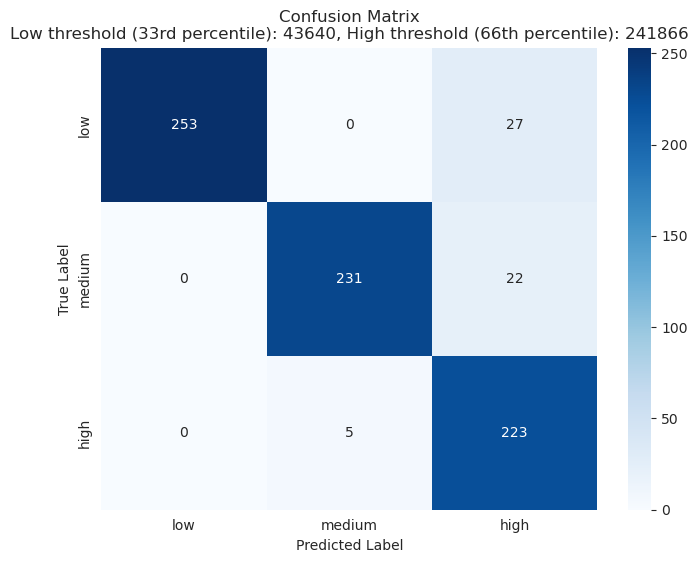

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to build the model for tuning
def build_model(hp):
    # Sequential branch (LSTM)
    seq_input = Input(shape=(X_seq_train.shape[1], X_seq_train.shape[2]), name="seq_input")
    x_seq = LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=False)(seq_input)
    x_seq = Dropout(hp.Float('dropout_seq', min_value=0.2, max_value=0.5, step=0.1))(x_seq)
    x_seq = BatchNormalization()(x_seq)
    
    # Non-sequential branch (Dense)
    nonseq_input = Input(shape=(X_nonseq_train.shape[1],), name="nonseq_input")
    x_nonseq = Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')(nonseq_input)
    x_nonseq = Dropout(hp.Float('dropout_nonseq', min_value=0.2, max_value=0.5, step=0.1))(x_nonseq)
    x_nonseq = BatchNormalization()(x_nonseq)
    
    # Combine both branches
    combined = Concatenate()([x_seq, x_nonseq])
    
    # Add Dense layers on top of the combined features
    x = Dense(hp.Int('dense_combined', min_value=64, max_value=256, step=64), activation='relu')(combined)
    x = Dropout(hp.Float('dropout_combined', min_value=0.2, max_value=0.5, step=0.1))(x)
    x = BatchNormalization()(x)
    output = Dense(3, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=[seq_input, nonseq_input], outputs=output)
    
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define the tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='tuning_results',
                     project_name='hyperparam_tuning')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define a list to store the results
all_results = []

# Define a function to be called after each trial to store results
def store_results(trial):
    # Extract hyperparameters and the corresponding validation accuracy
    result = {
        'lstm_units': trial.hyperparameters.get('lstm_units'),
        'dropout_seq': trial.hyperparameters.get('dropout_seq'),
        'dense_units': trial.hyperparameters.get('dense_units'),
        'dropout_nonseq': trial.hyperparameters.get('dropout_nonseq'),
        'dense_combined': trial.hyperparameters.get('dense_combined'),
        'dropout_combined': trial.hyperparameters.get('dropout_combined'),
        'learning_rate': trial.hyperparameters.get('learning_rate'),
        'val_accuracy': trial.score  # Validation accuracy from the trial
    }
    all_results.append(result)

# Attach the callback function to store results after each trial
tuner.oracle.update_trial = store_results

# Search for the best parameters using the training and validation data
tuner.search([X_seq_train, X_nonseq_train], y_train,
             validation_data=([X_seq_test, X_nonseq_test], y_test),
             epochs=50,
             batch_size=32,
             callbacks=[early_stopping])

# Convert all results to a DataFrame
results_df = pd.DataFrame(all_results)

# Save results to a CSV file (append if it exists)
if not os.path.exists('results_all_trials.csv'):
    results_df.to_csv('results_all_trials.csv', index=False)
else:
    results_df.to_csv('results_all_trials.csv', mode='a', header=False, index=False)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Save the best hyperparameters to a CSV file
best_results = {
    'lstm_units': best_hps.get('lstm_units'),
    'dropout_seq': best_hps.get('dropout_seq'),
    'dense_units': best_hps.get('dense_units'),
    'dropout_nonseq': best_hps.get('dropout_nonseq'),
    'dense_combined': best_hps.get('dense_combined'),
    'dropout_combined': best_hps.get('dropout_combined'),
    'learning_rate': best_hps.get('learning_rate')
}

best_results_df = pd.DataFrame([best_results])
if not os.path.exists('best_results.csv'):
    best_results_df.to_csv('best_results.csv', index=False)
else:
    best_results_df.to_csv('best_results.csv', mode='a', header=False, index=False)

# Print the best hyperparameters
print("Best Hyperparameters:", best_results)

# Now that we have the best model, let's train it again with the best hyperparameters

# Build the model with the best hyperparameters
best_model = build_model(best_hps)

# Train the model
history = best_model.fit([X_seq_train, X_nonseq_train], y_train, 
                         epochs=50, 
                         batch_size=32, 
                         validation_data=([X_seq_test, X_nonseq_test], y_test), 
                         callbacks=[early_stopping])

# Save the accuracy of the best model to a file
accuracy = history.history['val_accuracy'][-1]  # The last value in the validation accuracy history
accuracy_df = pd.DataFrame({'val_accuracy': [accuracy]})
accuracy_df.to_csv('final_accuracy.csv', index=False)

# Print the accuracy
print(f"Final Validation Accuracy: {accuracy:.4f}")

# Now, let's generate the confusion matrix for the best model
y_pred = best_model.predict([X_seq_test, X_nonseq_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Generate the true labels (in case they're one-hot encoded)
y_true = np.argmax(y_test, axis=1)  # Convert true labels to class indices if they are one-hot encoded

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.title(f'Confusion Matrix\nLow threshold (33rd percentile): {low_threshold:.0f}, High threshold (66th percentile): {high_threshold:.0f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [17]:
import os
import json
import pandas as pd

# Define the relative path to the tuning results directory
tuning_results_dir = './tuning_results/hyperparam_tuning'  # Relative path to the hyperparameter tuning results folder

# List to store the trial data
all_trial_results = []

# Loop through each trial subdirectory and extract results
for trial_dir in os.listdir(tuning_results_dir):
    trial_path = os.path.join(tuning_results_dir, trial_dir, 'trial.json')
    if os.path.exists(trial_path):
        with open(trial_path, 'r') as f:
            trial_data = json.load(f)
            
            # Extract hyperparameters and validation accuracy/score from 'values' and 'metrics'
            result = {
                'trial_id': trial_data.get('trial_id'),
                'lstm_units': trial_data['hyperparameters']['values'].get('lstm_units'),
                'dropout_seq': trial_data['hyperparameters']['values'].get('dropout_seq'),
                'dense_units': trial_data['hyperparameters']['values'].get('dense_units'),
                'dropout_nonseq': trial_data['hyperparameters']['values'].get('dropout_nonseq'),
                'dense_combined': trial_data['hyperparameters']['values'].get('dense_combined'),
                'dropout_combined': trial_data['hyperparameters']['values'].get('dropout_combined'),
                'learning_rate': trial_data['hyperparameters']['values'].get('learning_rate'),
                'val_accuracy': trial_data['metrics']['metrics']['val_accuracy']['observations'][0]['value'][0]  # Extracting val_accuracy
            }
            all_trial_results.append(result)

# Convert the results to a DataFrame
trial_results_df = pd.DataFrame(all_trial_results)

# Save to a CSV file for easy access later
trial_results_df.to_csv('./tuning_results_all_trials.csv', index=False)

# Show the first few rows of the trial data
print(trial_results_df.head())


  trial_id  lstm_units  dropout_seq  dense_units  dropout_nonseq   
0     0000          32          0.2           64             0.2  \
1     0001          32          0.3           64             0.4   
2     0002          32          0.4           64             0.4   
3     0003          96          0.3           96             0.3   
4     0004          32          0.3           96             0.2   

   dense_combined  dropout_combined  learning_rate  val_accuracy  
0             192               0.4       0.000735      0.416557  
1             256               0.2       0.000245      0.390276  
2             256               0.2       0.000276      0.408673  
3             128               0.4       0.000846      0.461235  
4              64               0.4       0.000199      0.361367  


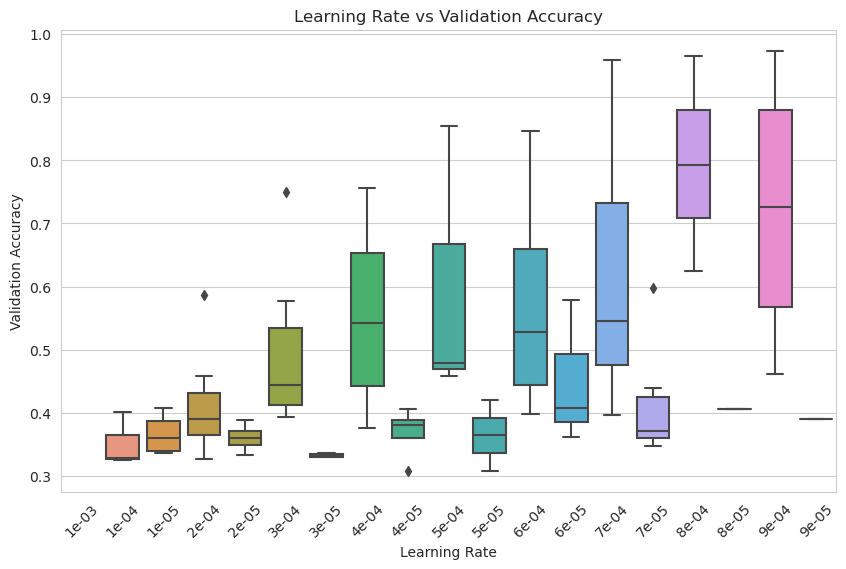

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Find the minimum and maximum learning rate values in the dataset
min_lr = trial_results_df['learning_rate'].min()
max_lr = trial_results_df['learning_rate'].max()

# Generate 10 evenly spaced learning rates on a log scale between the min and max values
learning_rate_ticks = np.logspace(np.log10(min_lr), np.log10(max_lr))

# Discretize the learning_rate for the boxplot (so it's treated as a categorical variable)
trial_results_df['learning_rate_discrete'] = pd.cut(
    trial_results_df['learning_rate'],
    bins=learning_rate_ticks,
    labels=[f"{lr:.0e}" for lr in learning_rate_ticks[1:]],
    include_lowest=True,
    ordered=False  # This allows duplicate labels
)

# Plot Learning Rate vs validation accuracy with the discretized learning rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='learning_rate_discrete', y='val_accuracy', data=trial_results_df)

# Customize the plot labels and title
plt.title('Learning Rate vs Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')

# Show the plot
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


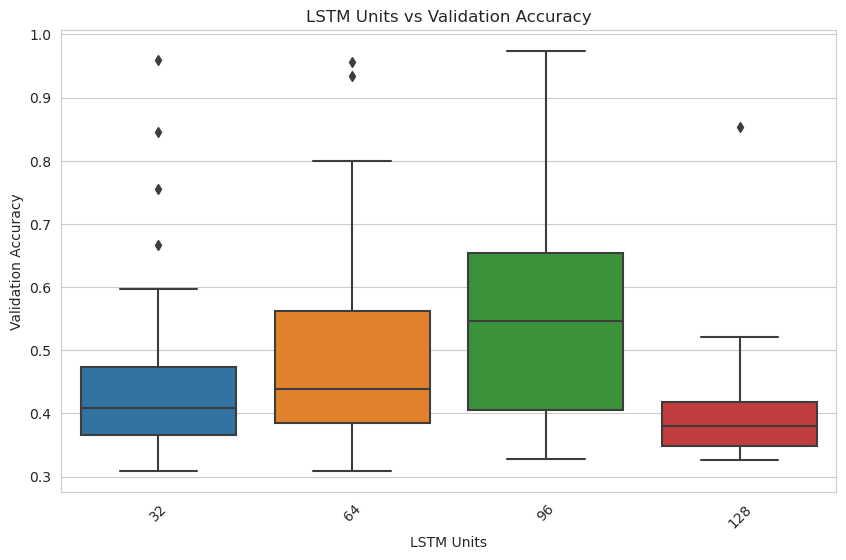

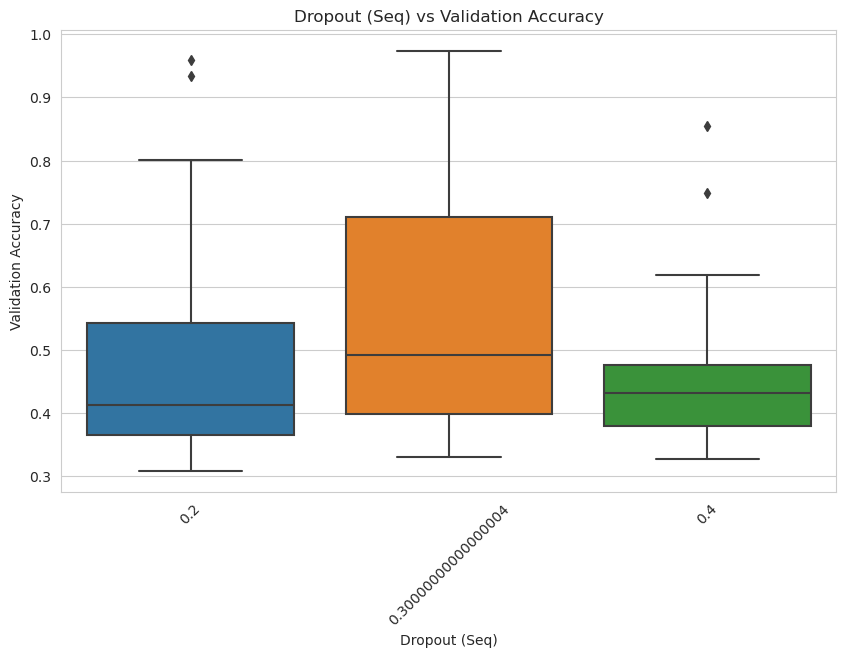

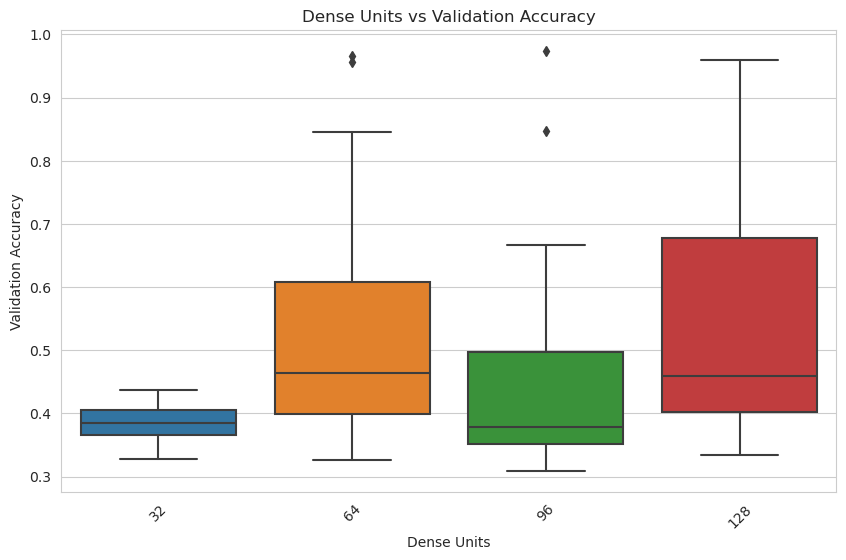

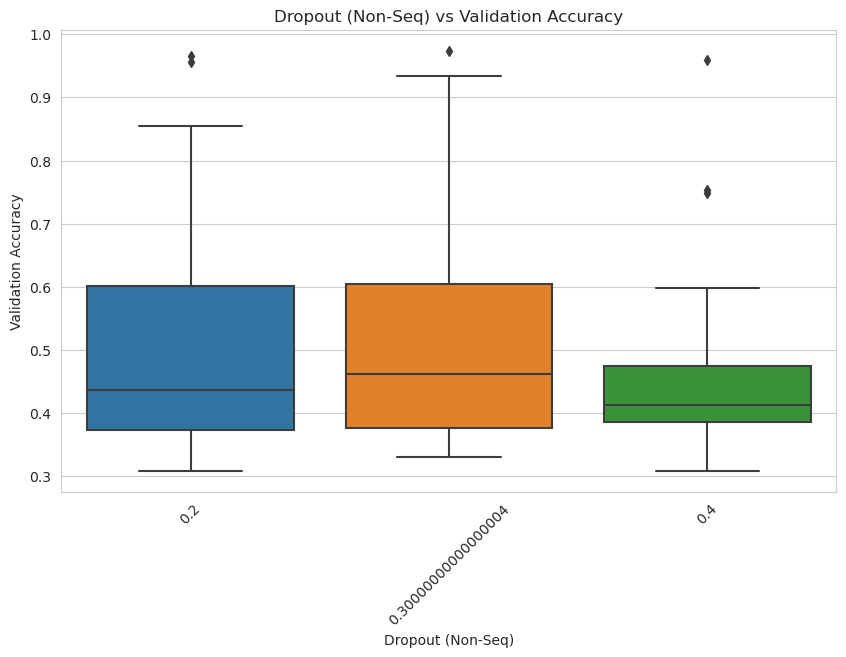

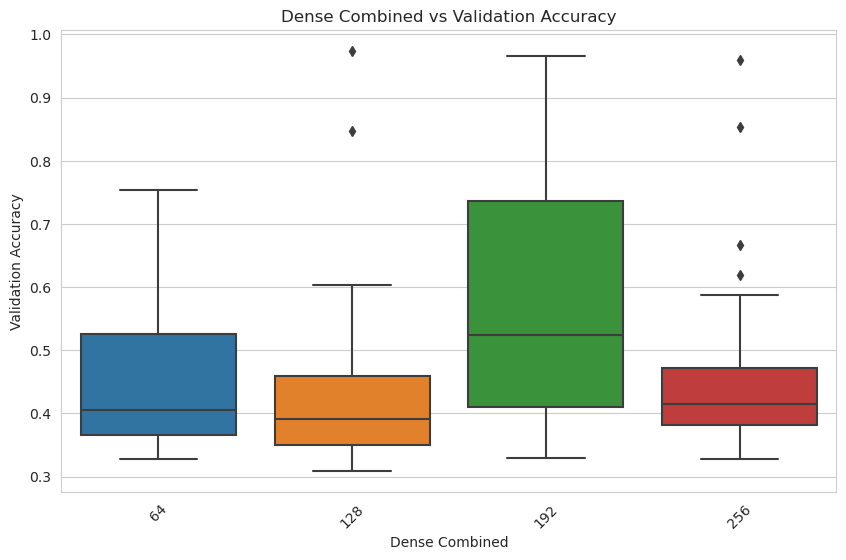

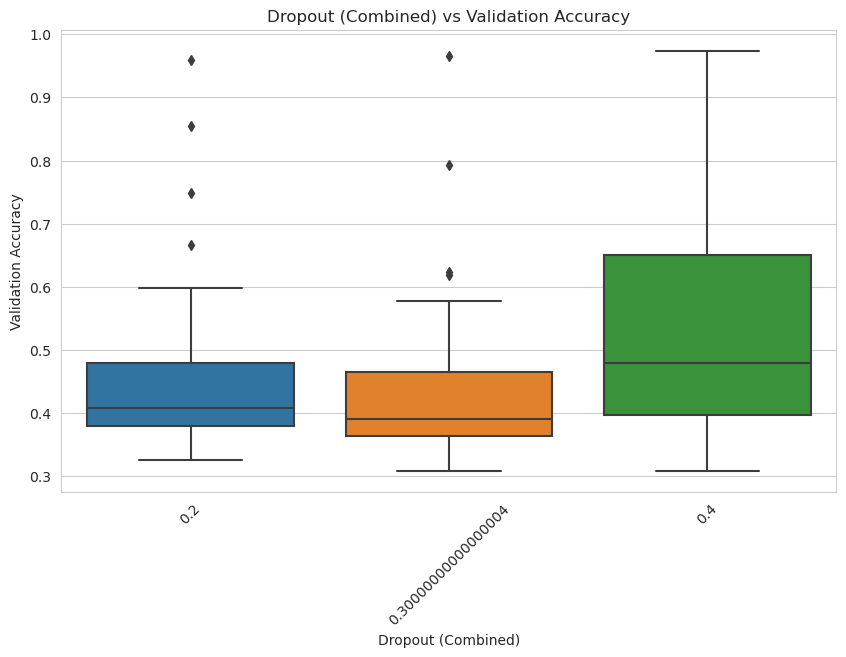

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot a function for hyperparameter vs validation accuracy
def plot_hyperparameter_vs_accuracy(df, param_name, title, xlabel, ylabel='Validation Accuracy'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=param_name, y='val_accuracy', data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()

# Plot for lstm_units vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'lstm_units', 'LSTM Units vs Validation Accuracy', 'LSTM Units')

# Plot for dropout_seq vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dropout_seq', 'Dropout (Seq) vs Validation Accuracy', 'Dropout (Seq)')

# Plot for dense_units vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dense_units', 'Dense Units vs Validation Accuracy', 'Dense Units')

# Plot for dropout_nonseq vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dropout_nonseq', 'Dropout (Non-Seq) vs Validation Accuracy', 'Dropout (Non-Seq)')

# Plot for dense_combined vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dense_combined', 'Dense Combined vs Validation Accuracy', 'Dense Combined')

# Plot for dropout_combined vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dropout_combined', 'Dropout (Combined) vs Validation Accuracy', 'Dropout (Combined)')


Epoch 1/50
95/95 [==============================] - 2s 8ms/step - loss: 1.3975 - accuracy: 0.3638 - val_loss: 1.0775 - val_accuracy: 0.4179
Epoch 2/50
95/95 [==============================] - 0s 5ms/step - loss: 1.2324 - accuracy: 0.3862 - val_loss: 1.0374 - val_accuracy: 0.4258
Epoch 3/50
95/95 [==============================] - 0s 5ms/step - loss: 1.0816 - accuracy: 0.4645 - val_loss: 0.9675 - val_accuracy: 0.5085
Epoch 4/50
95/95 [==============================] - 0s 5ms/step - loss: 0.9953 - accuracy: 0.4957 - val_loss: 0.9173 - val_accuracy: 0.5453
Epoch 5/50
95/95 [==============================] - 0s 4ms/step - loss: 0.9055 - accuracy: 0.5303 - val_loss: 0.8671 - val_accuracy: 0.5427
Epoch 6/50
95/95 [==============================] - 0s 5ms/step - loss: 0.8463 - accuracy: 0.5691 - val_loss: 0.7567 - val_accuracy: 0.5742
Epoch 7/50
95/95 [==============================] - 0s 5ms/step - loss: 0.8086 - accuracy: 0.5868 - val_loss: 0.7282 - val_accuracy: 0.6176
Epoch 8/50
95/95 [==

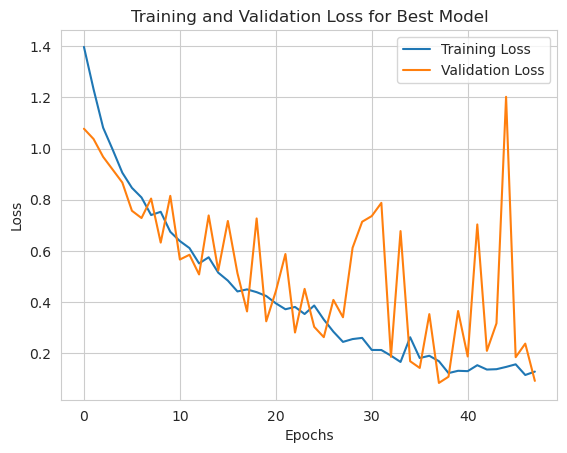

In [20]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = build_model(best_hps)  # Make sure the build_model function is the one used in tuning

# Train the model on the data
history = best_model.fit(
    [X_seq_train, X_nonseq_train], y_train,
    epochs=50,  # Adjust based on the number of epochs you used in tuning
    batch_size=32,
    validation_data=([X_seq_test, X_nonseq_test], y_test),
    callbacks=[early_stopping]  # Optional: if you used early stopping during tuning
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Best Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
